# Bank Note Forgery Analysis with Tensorflow

This analysis uses the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

In [17]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background
# quell warnings
import warnings
warnings.filterwarnings('ignore')
# ML imports
import sklearn
from sklearn import metrics
# Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Logistic Regression
#
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [2]:
df = pd.read_csv('bank_note_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


** Check the head of the Data **

In [4]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

Exploring the raw data

**Creating a Countplot of the Classes (Authentic 1 vs Fake 0)**

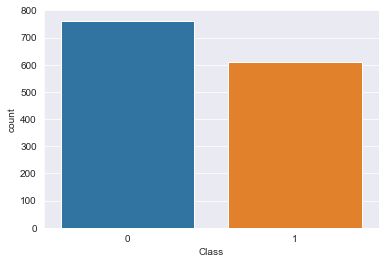

In [7]:
sns.countplot(x='Class',data=df)

In [12]:
df1 = df.copy()

In [13]:
df1['Class'] = df1['Class'].astype(dtype='bool')



In [14]:
df1['Class']

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1342     True
1343     True
1344     True
1345     True
1346     True
1347     True
1348     True
1349     True
1350     True
1351     True
1352     True
1353     True
1354     True
1355     True
1356     True
1357     True
1358     True
1359     True
1360     True
1361     True
1362     True
1363     True
1364     True
1365     True
1366     True
1367     True
1368     True
1369     True
1370     True
1371     True
Name: Class, Length: 1372, dtype: bool

#### Create a PairPlot of the Data with Seaborn, set Hue to Class 

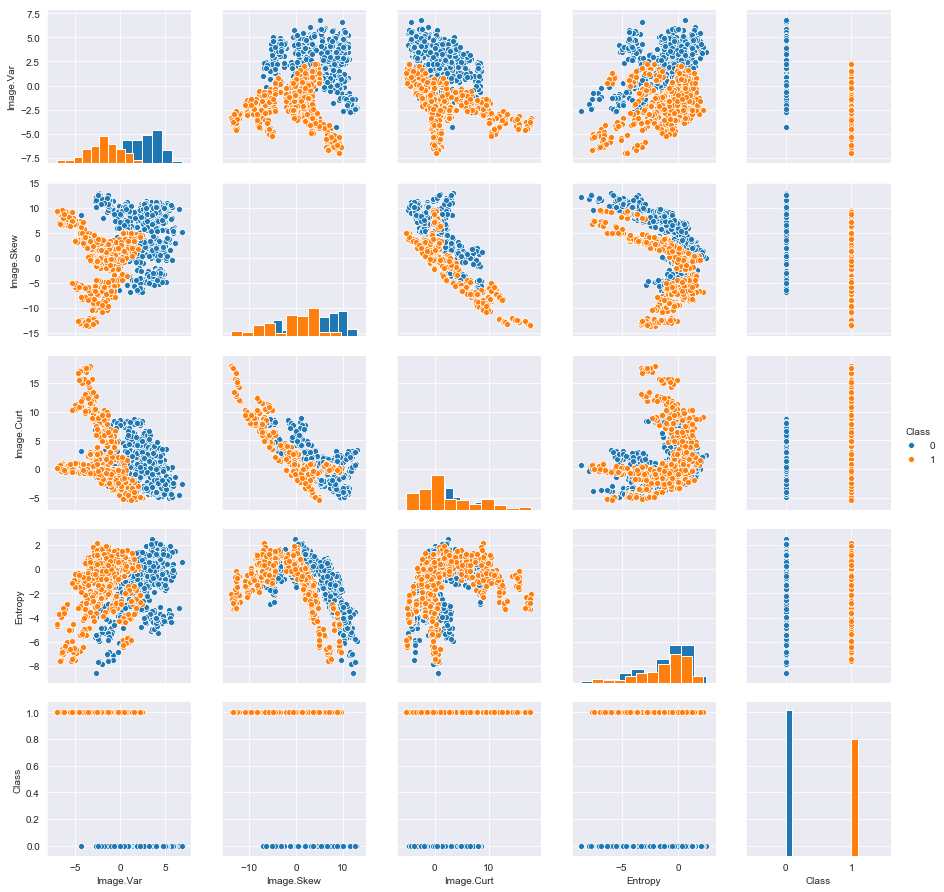

In [16]:
sns.pairplot(df,hue='Class',diag_kind='hist')

## Data Preparation 

Standardizing the data for the Neural Net

### Standard Scaling



**Create a StandardScaler() object called scaler.**

In [18]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [24]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [25]:
scaled_features = scaler.fit_transform(df.drop('Class',axis=1))

In [28]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [30]:
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [31]:
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

**Creating two objects X and y which are the scaled feature values and labels respectively.**

In [35]:
# Target
y = df['Class']
# Features
X = df.drop('Class',axis=1)

In [36]:
# The Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Tensorflow Analysis

**Creating a list of feature column objects using tf.feature.numeric_column()**

In [37]:
feat_cols = []
for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [38]:
feat_cols

[NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

**Creating an object called classifier which is a DNNClassifier from learn. It will have 2 classes and a [10,20,10] hidden unit layer structure:**

In [40]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10,20,10], n_classes=2, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmprfqo7dpn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x13b539668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


**Creating a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True.**

In [41]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)

**Train classifier to the input function using steps=500.**

In [42]:
classifier.train(input_fn=input_func,steps=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmprfqo7dpn/model.ckpt.
INFO:tensorflow:loss = 7.144912, step = 1
INFO:tensorflow:global_step/sec: 416.536
INFO:tensorflow:loss = 0.008575607, step = 101 (0.241 sec)
INFO:tensorflow:global_step/sec: 690.202
INFO:tensorflow:loss = 0.118118964, step = 201 (0.144 sec)
INFO:tensorflow:global_step/sec: 

## Model Evaluation

**Creating another pandas_input_fn that takes in the X_test data for x. This one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [43]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [44]:
predictions = list(classifier.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/y7/npvsnnsx4fb77q7hsmzg0rn80000gn/T/tmprfqo7dpn/model.ckpt-480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [45]:
predictions[1]

{'logits': array([-6.1685915], dtype=float32),
 'logistic': array([0.0020898], dtype=float32),
 'probabilities': array([0.9979102 , 0.00208981], dtype=float32),
 'class_ids': array([0]),
 'classes': array([b'0'], dtype=object)}

In [46]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [47]:
print(confusion_matrix(y_test,final_preds))
print(classification_report(y_test,final_preds))

[[229   0]
 [  0 183]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



[[213   2]
 [ 10 187]]


             precision    recall  f1-score   support

          0       0.96      0.99      0.97       215
          1       0.99      0.95      0.97       197

avg / total       0.97      0.97      0.97       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [48]:
# import model
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Create an instance of the DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

In [50]:
# Fit the Data
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
# Make predictions
predictions = dtree.predict(X_test)

In [52]:
# Printing results
print('Classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       229
           1       1.00      0.97      0.98       183

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.98      0.99       412
weighted avg       0.99      0.99      0.99       412



Confusion Matrix
[[229   0]
 [  6 177]]


[[214   1]
 [  2 195]]


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **